<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/1_santos_aleman/1_santos_aleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Dinámica poblacional para Ingeniería Agropecuaria

## Ejercicio 1. Ganancia de peso 

Un becerro que pesa 60 libras al nacer gana peso a razón de 

$$ \frac{dw}{dt} = k(1200-w), $$

donde $w$ es el peso en libras y $t$ es el tiempo en años.   

Resolver la ecuación diferencial usando la función `dsolve()` de SymPy.

a) Usar Sympy de Python para resolver la ecuación diferencial para $k = 0.8, 0.9$ y $1$.

b) Representar las tres soluciones utilizando deslizadores de Matplotlib.  

c) Si el animal se vende cuando su peso alcanza 800 libras, encontrar el tiempo de venta de cada uno de los modelos en el apartado a).  

d) ¿Cuál es el peso máximo del animal para cada uno de los modelos?

## Ejercicio 2. Ganancia de peso

Un becerro que pesa $w_{0}$ libras al nacer gana peso a razón de 
 
$$ \frac{dw}{dt} =  k(1200 - w), $$   
 
donde $w$ es el peso en libras y $t$ es el tiempo en años. Resolver la ecuación diferencial.  

Ejercicio tomado de la página de 451 Larson

<img src = 'https://bmeditores.mx/wp-content/uploads/2020/09/Crecimiento-ternero-1068x534.jpg'>

# Rúbrica de evaluación de este trabajo de modelamiento de problemas de dinámica poblacional para formación de ingenieros agropecuarios

## Empieza planteando completamente el PVI de manera simbólica e interpretando el PVI en el contexto real 

$$ \frac{dw}{dt} = k(1200 - w), \ \ \ \ \ \ w(0) = 60 $$

## Resuelve analíticamente el PVI dado 

$$ \frac{dw}{dt} = k(1200 - w) , \ \ \ \ \ w(0) = 60 $$

Empezamos resolviendo la ED 

$$ \frac{dw}{dt} = k(1200 - w) $$


y para ello la vamos a clasificar: 

Como la ED dada la podemos llevar a la forma estándar 

$$ y' + p(x)y = g(x) $$

entonces ella es lineal de primer orden.  


En efecto, 

$$ \frac{dw}{dt} + kw = 1200k $$

donde $k$ es la constante de proporcionalidad. 


## Clasifica,  Resuelve y verifica el PVI utilizando Sympy

In [2]:
from sympy import var, Function, diff, Eq, classify_ode, dsolve, checkodesol, solvers

In [3]:
w,t,k = var('w t k') # declaro las variables del problema 

In [4]:
w = Function('w')

In [5]:
ecuacion_dif = Eq(diff(w(t), t), k*(1200 - w(t))) 
ecuacion_dif 

Eq(Derivative(w(t), t), k*(1200 - w(t)))

## Clasifique con sympy la ED dada

In [6]:
classify_ode(ecuacion_dif)

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

## Determina la solución general de la ED que hace parte del PVI dado

In [7]:
sol_gen = dsolve(ecuacion_dif, w(t), hint = 'separable') 
sol_gen 

Eq(w(t), C1*exp(-k*t) + 1200)

## Grafica de manera animada con deslizador la solución general para ver algunas de las funciones que hacen parte de la familia solución

In [12]:
import numpy as np 

import matplotlib.pyplot as plt 

from ipywidgets import interact 

def graficar_animado(C1 = -1140, k = 1):
    T = np.linspace(0,5)
    W = C1*np.exp(-k*T) + 1200
    plt.plot(T,W)
    plt.plot([0,5],[1200,1200], 'r--')
    plt.axis([0,5,0, 2500])
    plt.grid(alpha = 0.4)
    
interact(graficar_animado, C1 = (-1200,1200,50), k = (0.8, 1.4, 0.2))    


interactive(children=(IntSlider(value=-1140, description='C1', max=1200, min=-1200, step=50), FloatSlider(valu…

<function __main__.graficar_animado(C1=-1140, k=1)>

## Redacta por lo menos 4 observaciones acerca del comportamiento general de la familia de soluciones de la ED

1.  
2.  
3.  
4.  
5.  

## Determina la solución del PVI utilizando la función `dsolve()` y el hiperparámetro `ics`

In [34]:
sol_pvi = dsolve(ecuacion_dif, w(t), ics = {sol_gen.lhs.subs(t,0):60})
sol_pvi 

Eq(w(t), 1200 - 1140*exp(-t))

## Grafica la solución del PVI

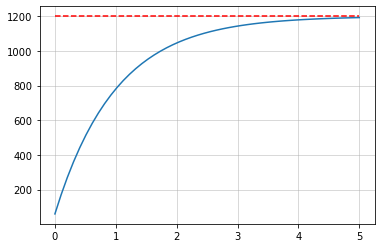

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 

T = np.linspace(0,5)
C1 = -1140
W = C1*np.exp(-T) + 1200
plt.plot(T,W)
plt.plot([0,5], [1200, 1200], 'r--')# grafica de la asíntota horizontal o peso límite
plt.grid(alpha = 0.6)

plt.show() 


# Redacta por lo menos 4 observaciones o inferencias del gráfico de la solución del PVI

1. El comportamiento cuando $t \to \infty$ del paso $w$ es:  
2.   
3.  
4.  

## Verifica que la solución del PVI es correcta utilizando python y sympy

In [35]:
checkodesol(ecuacion_dif, sol_pvi) 

(True, 0)

In [36]:
sol_pvi.rhs.subs(t,0)

60

## Redacta la conclusión de la verificación de la solución del PVI con sympy